<a href="https://colab.research.google.com/github/Khuzamaalk/T5_BootCamp/blob/main/M_Task_1_Artificial_Neural_Networks_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [135]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [136]:
!pip install tensorflow

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [138]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [139]:
df.shape

(147972, 21)

In [140]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [141]:
df.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [142]:
df.duplicated().sum() # No Duplicates to handle

0

In [143]:
df.dtypes

,0
School_Year,object
Busbreakdown_ID,int64
Run_Type,object
Bus_No,object
Route_Number,object
Reason,object
Schools_Serviced,object
Occurred_On,object
Created_On,object
Boro,object


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [144]:
# Plot the box plot for 'Route_Number to see if there's an outlier to handle
'''import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Route_Number']) # No Outliers
plt.show()'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\nsns.boxplot(x=df['Route_Number']) # No Outliers \nplt.show()"

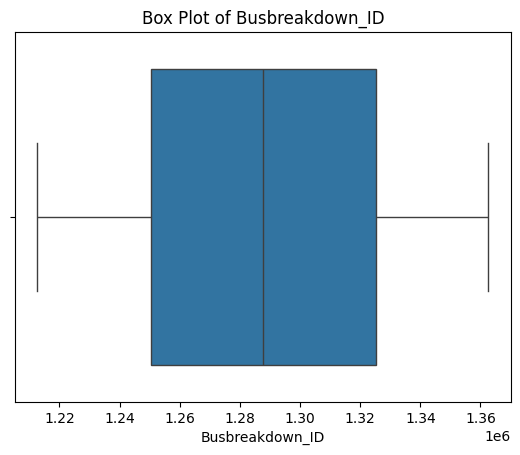

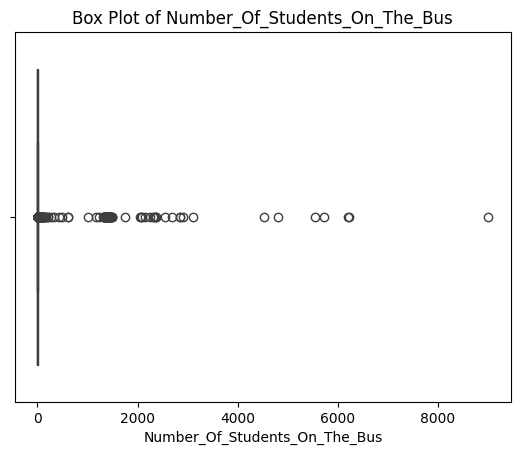

In [145]:
# I want to see the outliers clearly, so I will use the box plot

numerical_cols = df.select_dtypes(include=['int']).columns
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [146]:
# I will remove the outliers by using the IQR method

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Any thing out of this range will not taken

In [147]:
#df.drop(['Bus_No'], axis=1, inplace=True) # Not a nessuceray column

In [148]:
# I dropped the columns that I see it is not Necessary
df.drop(['Busbreakdown_ID'], axis=1, inplace=True)
df.drop(['School_Year'], axis=1, inplace=True)
df.drop(['Occurred_On'], axis=1, inplace=True)
df.drop(['Created_On'], axis=1, inplace=True)
df.drop(['Informed_On'], axis=1, inplace=True)
df.drop(['Last_Updated_On'], axis=1, inplace=True)

In [149]:
df.drop(['Incident_Number'], axis=1, inplace=True)

In [150]:
df.shape # After Dropping Columns: 21 => 14

(140298, 14)

In [151]:
df['How_Long_Delayed'].sample(5)

,How_Long_Delayed
113905,45min
14599,NaN
30906,10 MIN
35580,15MINS
86933,20MINS


In [152]:
df['Boro'].sample(5)

,Boro
12582,Manhattan
52950,Brooklyn
111977,Manhattan
93806,Bronx
125809,NaN


In [153]:
df['Reason'].sample(10)

,Reason
65330,Heavy Traffic
125422,Heavy Traffic
1099,Other
94272,Heavy Traffic
84538,Flat Tire
141263,Other
27544,Flat Tire
68521,Mechanical Problem
131298,Heavy Traffic
147445,Heavy Traffic


In [154]:
df['Route_Number'].sample(5)

,Route_Number
93393,K413
138723,Q823
38380,X879
104310,L005
122359,X9134


In [155]:
df['Run_Type'].sample(5)

,Run_Type
34743,Special Ed AM Run
3846,Special Ed AM Run
110815,Special Ed AM Run
33028,Special Ed PM Run
75450,General Ed AM Run


In [156]:
#df['Run_Type'] = df['Run_Type'].fillna("Unknown")

In [157]:
df['Run_Type'].fillna("NaN", inplace=True)
df['Route_Number'].fillna("NaN", inplace=True)
df['Reason'].fillna("NaN", inplace=True)
df['Boro'].fillna("NaN", inplace=True)
df['How_Long_Delayed'].fillna("NaN", inplace=True)

In [158]:
df.isnull().sum()

,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Boro,0
Bus_Company_Name,0
How_Long_Delayed,0
Number_Of_Students_On_The_Bus,0
Has_Contractor_Notified_Schools,0


In [161]:
df.head()

,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,Pre-K/EI,811,1,Other,C353,Bronx,"G.V.C., LTD.",10MINUTES,5,Yes,Yes,No,Running Late,Pre-K
1,Pre-K/EI,9302,1,Heavy Traffic,C814,Bronx,"G.V.C., LTD.",25 MINUTES,3,Yes,Yes,No,Running Late,Pre-K
5,Special Ed AM Run,12568,P640,Heavy Traffic,24071,NaN,ACME BUS CORP. (B2321),15mins,3,Yes,Yes,Yes,Running Late,School-Age
6,Pre-K/EI,9304,4,Heavy Traffic,C353,Bronx,"G.V.C., LTD.",20MIN,3,Yes,Yes,Yes,Running Late,Pre-K
7,Pre-K/EI,GV0365,3,Heavy Traffic,C579,Bronx,"G.V.C., LTD.",10MIN,4,Yes,Yes,No,Running Late,Pre-K


In [163]:
# Encoding Data by using Label Encoder

label_encoder = LabelEncoder()


columns_to_encode = ['Run_Type', 'Bus_No', 'Reason', 'Schools_Serviced', 'Boro', 'Bus_Company_Name', 'How_Long_Delayed',
                     'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
                     'Breakdown_or_Running_Late', 'School_Age_or_PreK', 'Route_Number']


for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [164]:
df.head()

,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Boro,Bus_Company_Name,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,4,7410,76,7,4919,1,26,182,5,1,1,0,1,0
1,4,8039,76,3,4986,1,26,810,3,1,1,0,1,0
5,8,1170,5752,3,3503,5,0,452,3,1,1,1,1,1
6,4,8042,430,3,4919,1,26,726,3,1,1,1,1,0
7,4,8894,261,3,4971,1,26,179,4,1,1,0,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [165]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [167]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
df.head()

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [168]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [169]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [170]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9424 - loss: 0.1390 - val_accuracy: 0.8205 - val_loss: 555.4335
Epoch 2/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9723 - loss: 0.0649 - val_accuracy: 0.8031 - val_loss: 598.4316
Epoch 3/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9766 - loss: 0.0571 - val_accuracy: 0.7873 - val_loss: 642.6733
Epoch 4/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9778 - loss: 0.0532 - val_accuracy: 0.7464 - val_loss: 807.8848
Epoch 5/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9810 - loss: 0.0483 - val_accuracy: 0.7095 - val_loss: 931.6536
Epoch 6/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9824 - loss: 0.0434 - val_accuracy: 0.7027 - val_loss: 969.4520
Epoch 7/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9836 - loss: 0.0398 - val_accuracy: 0.6381 - val_loss: 1561.6562
Epoch 8/30
2806/2806 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9849 - 

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [171]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9871 - loss: 0.0324
Test Loss: 0.03277553617954254
Test Accuracy: 0.9873842000961304


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [176]:
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# classificatiob report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

877/877 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3382
           1       0.99      0.99      0.99     24678

    accuracy                           0.99     28060
   macro avg       0.97      0.97      0.97     28060
weighted avg       0.99      0.99      0.99     28060

Confusion Matrix:
[[ 3239   143]
 [  211 24467]]


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

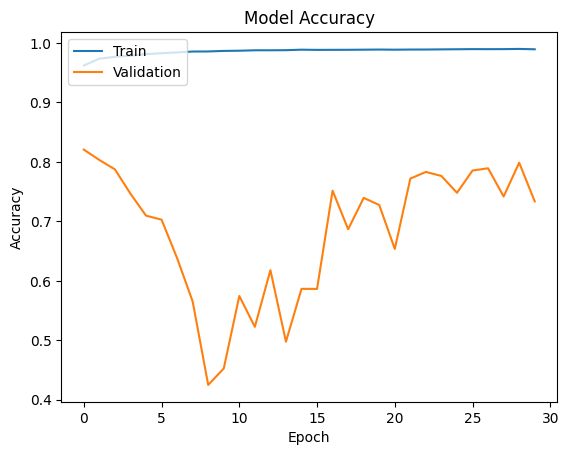

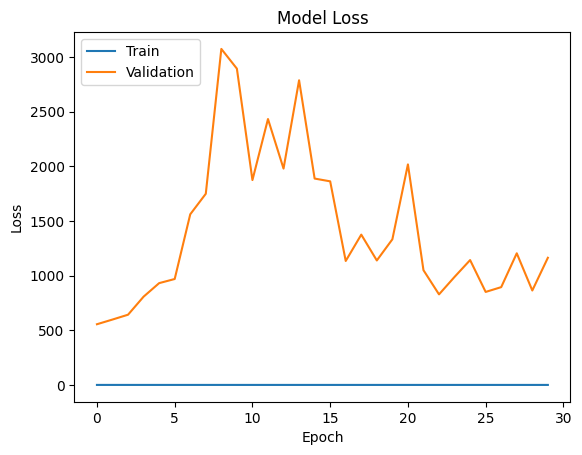

In [177]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Save the Model
Save the trained model for submission.

In [178]:
model.save('LabExam_ann_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: